<a href="https://colab.research.google.com/github/KilluJ/nlp-projects/blob/main/%5Bfraud%20detection%5D%20logistic%20reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
X = df.drop(['Class'], axis = 1)
y = df['Class']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [4]:
X_train.shape, X_test.shape

((227845, 30), (56962, 30))

In [5]:
#check if train and test sets got roughly the same portion of fraud
y_train.sum()/len(y_train)

0.0017160789132963199

In [6]:
#check if train and test sets got roughly the same portion of fraud
y_test.sum()/len(y_test)

0.001773111899160844

In [7]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model, since the data is imbalanced, the weight is set to 0.08 for Class 0 and 0.92 for Class 1
# after several rounds of tuning
logreg = LogisticRegression(solver='liblinear', random_state=0, class_weight = {0:.08, 1:.92})


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.08, 1: 0.92}, random_state=0,
                   solver='liblinear')

In [8]:
y_pred_test = logreg.predict(X_test)

In [9]:
# probability of getting output as 0 - non-fraud

logreg.predict_proba(X_test)[:,0]

array([0.99882327, 0.99973874, 0.99783433, ..., 0.99413525, 0.99764393,
       0.9995331 ])

In [10]:
# probability of getting output as 1 - fraud

logreg.predict_proba(X_test)[:,1]

array([0.00117673, 0.00026126, 0.00216567, ..., 0.00586475, 0.00235607,
       0.0004669 ])

In [11]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9989


In [12]:
y_pred_train = logreg.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9988


In [13]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.9988
Test set score: 0.9989


In [14]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[56815    46]
 [   18    83]]

True Positives(TP) =  56815

True Negatives(TN) =  83

False Positives(FP) =  46

False Negatives(FN) =  18


<Axes: >

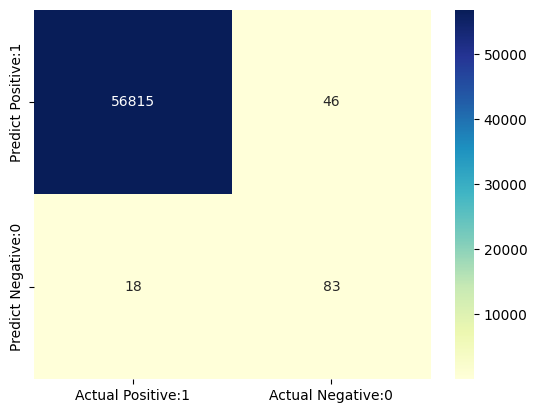

In [15]:
# visualize confusion matrix with seaborn heatmap
import numpy as np # linear algebra
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.64      0.82      0.72       101

    accuracy                           1.00     56962
   macro avg       0.82      0.91      0.86     56962
weighted avg       1.00      1.00      1.00     56962

